In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [66]:
url = "https://raw.githubusercontent.com/infoslack/ml-book-exemplos/refs/heads/main/data/heart-disease.csv"
df = pd.read_csv(url)
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


## Meta
Conseguir atingir 95% de precissão em prever se o paciente tem ou não doença cardíaca.

## Atributos

age: idade em anos<br><br>
sex: sexo (1 = masculino; 0 = feminino)<br><br>
cp: tipo de dor no peito (0: angina típica, 1: angina atípica, 2: dor não anginosa, 3: assintomático)<br><br>
trestbps: pressão arterial em repouso (mm Hg)<br><br>
chol: colesterol em mg/dl<br><br>
fbs: glicemia em jejum > 120mg/dl (1=verdadeiro; 0=falso)<br><br>
restecg: resultado do eletrocardiograma em repouso (0=normal; 1=anormalidade; 2=hipertrofia ventricular)<br><br>
thalach: frequência cardíaca máxima atingida<br><br>
exang: angina induzida por exercício (1=sim; 0=não)<br><br>
oldpeak: depressão do segmento ST induzida por exercício<br><br>
slope: inclinação do segmento ST (0=ascendente; 1=plano; 2=descendente)<br><br>
ca: número de vasos principais coloridos por fluoroscopia (0-3)<br><br>
thal: resultado do teste de tálio (0=normal; 1=defeito corrigido; 2=defeito reversível)<br><br>
target: condição cardíaca (0=sem doença; 1=doença)

In [67]:
df['target'].value_counts()

# 165 tem
# 138 não tem

target
1    165
0    138
Name: count, dtype: int64

In [68]:
# colocar em porcentagem
df['target'].value_counts(normalize=True)

target
1    0.544554
0    0.455446
Name: proportion, dtype: float64

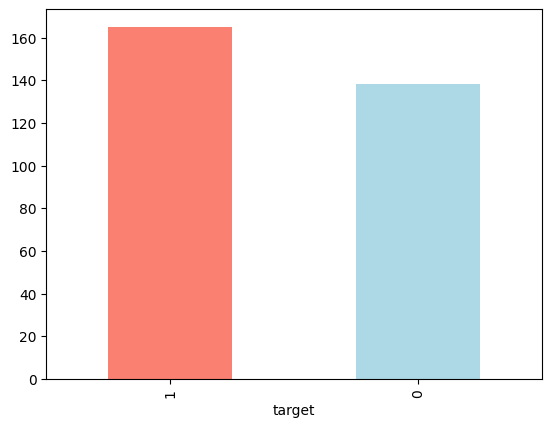

In [69]:
# colocar com gráfico
df['target'].value_counts().plot(kind='bar', color=['salmon', 'lightblue']);

In [70]:
#verificar sem tem valores nulos

df.info()

# analisamos que todas colunas são numéricas e não tem valores nulos

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [71]:
pd.crosstab(df['target'], df['sex'])

#verificar qual a proporção de homens e mulheres que tem doença cardíaca

# 1 = homem
# 0 = mulher

# temos 24 mulhes que não tem doença cardíaca e 72 que tem
# temos 114 homens que não tem doença cardíaca e 93 que tem


sex,0,1
target,,
0,24,114
1,72,93


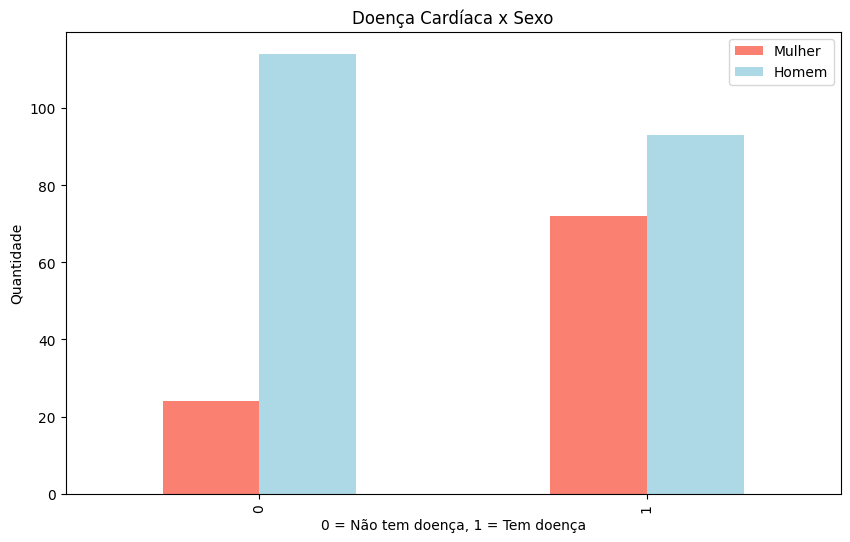

In [72]:
# fazer gráfico

pd.crosstab(df['target'], df['sex']).plot(kind='bar',
                                          color=['salmon','lightblue'],
                                          figsize=(10,6))

plt.title('Doença Cardíaca x Sexo')
plt.xlabel('0 = Não tem doença, 1 = Tem doença')
plt.ylabel('Quantidade')
plt.legend(['Mulher', 'Homem'])

Text(0, 0.5, 'Frequência Cardíaca Máxima')

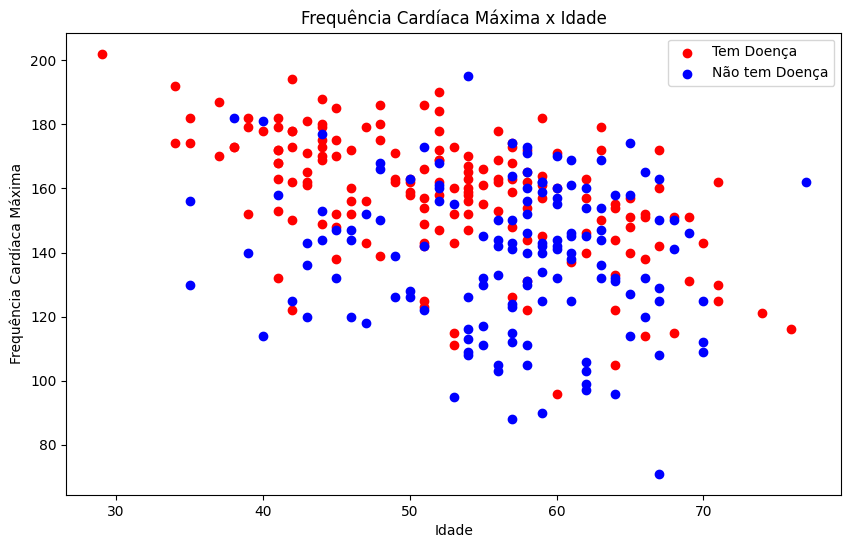

In [73]:
plt.figure(figsize=(10,6))

#comprar frequencia cardíaca máxima com idade

# tem doença cardíaca
plt.scatter(df['age'][df['target']==1],
            df['thalach'][df['target']==1],
            color='red')

# não tem doença cardíaca
plt.scatter(df['age'][df['target']==0],
            df['thalach'][df['target']==0],
            color='blue')
            

plt.title('Frequência Cardíaca Máxima x Idade')
plt.xlabel('Idade')
plt.ylabel('Frequência Cardíaca Máxima')
plt.legend(['Tem Doença', 'Não tem Doença']);
plt.ylabel('Frequência Cardíaca Máxima')

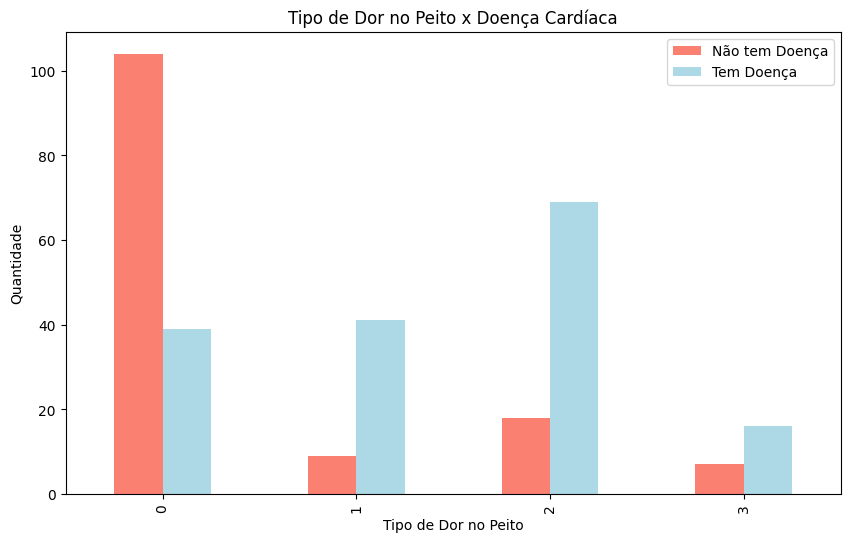

In [74]:
# comparar tipo de dor no peito com doença cardíaca

pd.crosstab(df['cp'], df['target']).plot(kind='bar',
                                        figsize=(10,6),
                                        color=['salmon','lightblue'])

plt.title('Tipo de Dor no Peito x Doença Cardíaca')
plt.xlabel('Tipo de Dor no Peito')
plt.ylabel('Quantidade')
plt.legend(['Não tem Doença', 'Tem Doença'])


**cp: tipo de dor no peito**

0: típicado no peito <br>
1: dor no peito, não relacionada ao coração <br>
2: espasmos, não relacionados ao coração <br>
3: dor torácica, sem sinais de doença <br>

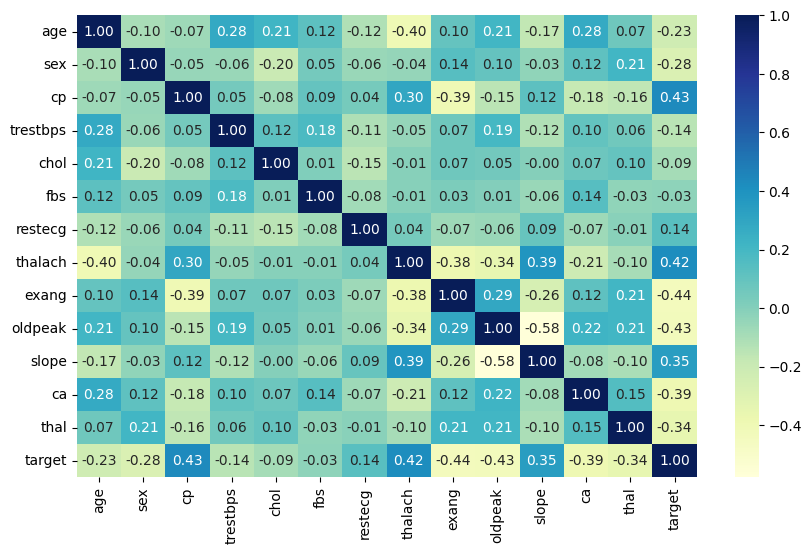

In [75]:
corr_matrix = df.corr()
plt.figure(figsize=(10,6))
sns.heatmap(corr_matrix, 
            annot=True, 
            fmt='.2f', 
            cmap='YlGnBu');

## Modelagem dos dados

In [76]:
## separar taget do restante dos dados

X = df.drop('target', axis=1)
y = df['target']

In [77]:
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [78]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

## Treino de Teste
    

In [79]:
from sklearn.model_selection import train_test_split

In [80]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [81]:
len(X_train), len(y_train)

(242, 242)

In [82]:
len(X_test), len(y_test)

(61, 61)

In [83]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

In [84]:
models={'KNN': KNeighborsClassifier(),
        'Logistic Regression': LogisticRegression(),
        'Random Forest': RandomForestClassifier()}

def fit_and_score(models, X_train, X_test, y_train, y_test):

    model_scores = {}

    for name, model in models.items():
        # treinar o modelo
        model.fit(X_train, y_train)
        # avaliar o modelo
        model_scores[name] = model.score(X_test, y_test)

    return model_scores

In [85]:
fit_and_score(models, X_train, X_test, y_train, y_test)

C:\Users\bryan.assuncao\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'KNN': 0.6229508196721312,
 'Logistic Regression': 0.8360655737704918,
 'Random Forest': 0.819672131147541}

## Ajuste de Hiperparâmetro e validação cruzada 

In [86]:

# Lista para armazenar o score de treino
train_scores = []

# Lista para armazenar o score de teste
test_scores = []

# Lista com diferentes valores para "n_neighbors"
# vamos começar com 1 e subir até 20
neighbors = range(1, 21)

# Instanciando o KNN
knn = KNeighborsClassifier()

# Loop para aplicar os diferentes valores em "n_neighbors"
for i in neighbors:
    knn.set_params(n_neighbors = i)
    
    # Treina o modelo
    knn.fit(X_train, y_train)
    
    # Guarda o score de treino
    train_scores.append(knn.score(X_train, y_train))
    
    # Armazena o score de teste
    test_scores.append(knn.score(X_test, y_test))

In [118]:
train_scores

[1.0,
 0.7768595041322314,
 0.768595041322314,
 0.7479338842975206,
 0.7768595041322314,
 0.743801652892562,
 0.7355371900826446,
 0.7107438016528925,
 0.7107438016528925,
 0.6859504132231405,
 0.71900826446281,
 0.7024793388429752,
 0.6983471074380165,
 0.6942148760330579,
 0.6900826446280992,
 0.6818181818181818,
 0.6818181818181818,
 0.6776859504132231,
 0.7066115702479339,
 0.6735537190082644]

Desempenho máximo de KNN nos dados de teste: 72.13%


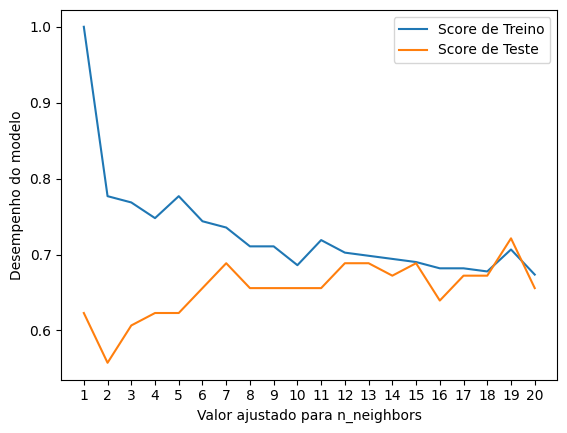

In [88]:
plt.plot(neighbors, train_scores, label="Score de Treino")
plt.plot(neighbors, test_scores, label="Score de Teste")
plt.xticks(np.arange(1, 21, 1))
plt.xlabel("Valor ajustado para n_neighbors")
plt.ylabel("Desempenho do modelo")
plt.legend()

print(f"Desempenho máximo de KNN nos dados de teste: {max(test_scores)*100:.2f}%")
     

In [89]:
# LogisticRegression hiperparâmetros
log_reg_grid = {"C": np.logspace(-4, 4, 20),
                "solver": ["liblinear"]}

# RandomForestClassifier hiperparâmetros
rf_grid = {"n_estimators": np.arange(10, 1000, 50),
           "max_depth": [None, 3, 5, 10],
           "min_samples_split": np.arange(2, 20, 2),
           "min_samples_leaf": np.arange(1, 20, 2)}

In [90]:
# Import
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

# Definindo o seed
np.random.seed(42)

# Configurando hiperparâmetros para LogisticRegression
rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                                param_distributions=log_reg_grid,
                                cv=5,
                                n_iter=20,
                                verbose=True)

# Treinando o modelo com as 20 combinações possíveis
rs_log_reg.fit(X_train, y_train);

Fitting 5 folds for each of 20 candidates, totalling 100 fits


In [91]:
rs_log_reg.score(X_test, y_test)

0.8360655737704918

In [92]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': np.float64(0.08858667904100823)}

In [93]:
# Definindo o seed
np.random.seed(42)

# Configurando hiperparâmetros para RandomForestClassifier
rs_rf = RandomizedSearchCV(RandomForestClassifier(),
                           param_distributions=rf_grid,
                           cv=5,
                           n_iter=20,
                           verbose=True)

# Treinando o modelo com as 20 combinações possíveis
rs_rf.fit(X_train, y_train);

Fitting 5 folds for each of 20 candidates, totalling 100 fits


In [94]:
rs_rf.best_params_

{'n_estimators': np.int64(560),
 'min_samples_split': np.int64(6),
 'min_samples_leaf': np.int64(7),
 'max_depth': 3}

In [95]:
rs_rf.score(X_test, y_test)

0.8360655737704918

In [96]:
log_reg_grid = {"C": np.logspace(-4, 4, 20),
                "solver": ["liblinear"]}

gs_log_reg = GridSearchCV(LogisticRegression(),
                          param_grid=log_reg_grid,
                          cv=5,
                          verbose=True)

gs_log_reg.fit(X_train, y_train);

Fitting 5 folds for each of 20 candidates, totalling 100 fits


In [97]:
gs_log_reg.best_params_

{'C': np.float64(0.08858667904100823), 'solver': 'liblinear'}

In [98]:
gs_log_reg.score(X_test, y_test)

0.8360655737704918

In [99]:
y_preds = gs_log_reg.predict(X_test)

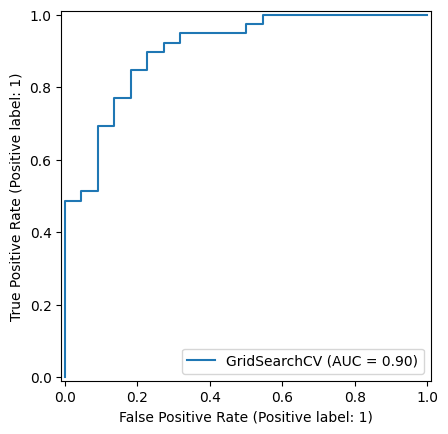

In [103]:
from sklearn.metrics import RocCurveDisplay

# Plota curva ROC
RocCurveDisplay.from_estimator(gs_log_reg, X_test, y_test)


In [104]:
from sklearn.metrics import confusion_matrix, classification_report
print(confusion_matrix(y_test, y_preds))

[[15  7]
 [ 3 36]]


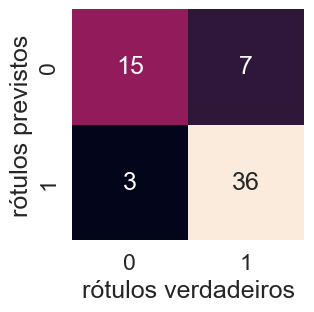

In [105]:
# Seaborn
import seaborn as sns
sns.set(font_scale=1.5)

def plot_conf_mat(y_test, y_preds):
    fig, ax = plt.subplots(figsize=(3, 3))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                     annot=True,
                     cbar=False)
    plt.xlabel("rótulos verdadeiros")
    plt.ylabel("rótulos previstos")
    
plot_conf_mat(y_test, y_preds)

In [106]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.83      0.68      0.75        22
           1       0.84      0.92      0.88        39

    accuracy                           0.84        61
   macro avg       0.84      0.80      0.81        61
weighted avg       0.84      0.84      0.83        61



In [107]:
gs_log_reg.best_params_

{'C': np.float64(0.08858667904100823), 'solver': 'liblinear'}

In [108]:
# Importa cross_val_score
from sklearn.model_selection import cross_val_score

# Passando o melhor modelo com os melhores hiperparâmetros
# que encontramos com (GridSearchCV)
clf = LogisticRegression(C=0.23357214690901212,
                         solver="liblinear")

In [109]:
# Cross-validated (validação cruzada)
cv_acc = cross_val_score(clf,
                         X,
                         y,
                         cv=5, # 5-fold
                         scoring="accuracy")
cv_acc
     

array([0.81967213, 0.90163934, 0.8852459 , 0.88333333, 0.75      ])

In [110]:
cv_acc = np.mean(cv_acc)
cv_acc

np.float64(0.8479781420765027)

In [111]:
cv_precision = np.mean(cross_val_score(clf,
                                       X,
                                       y,
                                       cv=5,
                                       scoring="precision"))

cv_recall = np.mean(cross_val_score(clf,
                                    X,
                                    y,
                                    cv=5,
                                    scoring="recall"))

cv_f1 = np.mean(cross_val_score(clf,
                                X,
                                y,
                                cv=5,
                                scoring="f1"))

cv_precision, cv_recall, cv_f1

(np.float64(0.8215873015873015),
 np.float64(0.9272727272727274),
 np.float64(0.8705403543192143))

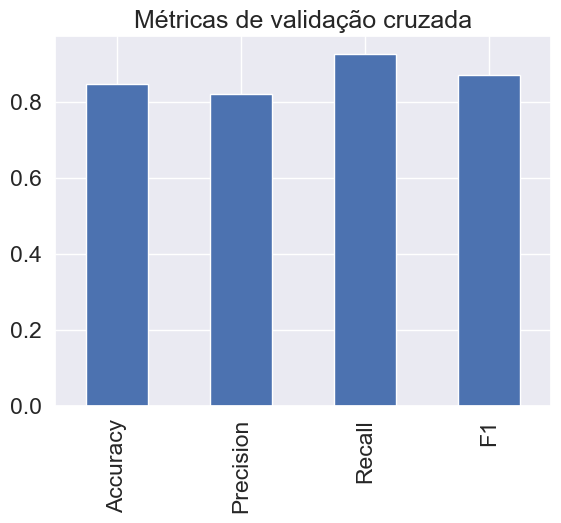

In [112]:
# Plot cross-validated metrics
cv_metrics = pd.DataFrame({"Accuracy": cv_acc,
                            "Precision": cv_precision,
                            "Recall": cv_recall,
                            "F1": cv_f1},
                            index=[0])
cv_metrics.T.plot.bar(title="Métricas de validação cruzada", legend=False);

In [113]:
clf.fit(X_train, y_train);
clf.coef_

array([[ 0.00720447, -0.82942711,  0.68781038, -0.00918948, -0.00450951,
         0.04765315,  0.24597799,  0.02534656, -0.56541722, -0.52563041,
         0.38485089, -0.6336142 , -0.62968847]])

In [115]:
features_dict = dict(zip(df.columns, list(clf.coef_[0])))
features_dict

{'age': np.float64(0.007204465463345045),
 'sex': np.float64(-0.8294271065561045),
 'cp': np.float64(0.6878103815240064),
 'trestbps': np.float64(-0.009189481317152746),
 'chol': np.float64(-0.004509505437292402),
 'fbs': np.float64(0.047653146198493104),
 'restecg': np.float64(0.24597798573878554),
 'thalach': np.float64(0.025346561466826335),
 'exang': np.float64(-0.5654172162160921),
 'oldpeak': np.float64(-0.5256304072111415),
 'slope': np.float64(0.3848508892337123),
 'ca': np.float64(-0.6336141959651272),
 'thal': np.float64(-0.6296884664204394)}

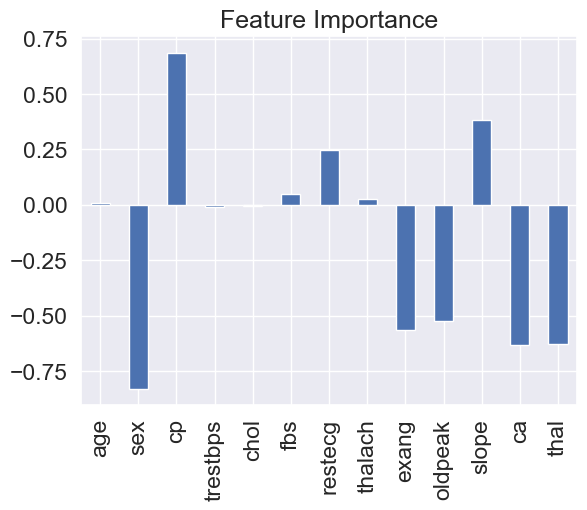

In [116]:
features_df = pd.DataFrame(features_dict, index=[0])
features_df.T.plot.bar(title="Feature Importance", legend=False);

In [117]:
pd.crosstab(df["sex"], df["target"])

target,0,1
sex,,
0,24,72
1,114,93
